In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL

In [2]:
def show_image(img_list):
    plt.figure(figsize=(20,10))
    [plt.subplot(1, len(img_list), i+1) and plt.imshow(img_list[i]) for i in range(len(img_list))]
    plt.show()

In [3]:
def convert_1d_array(img_2d):
    return np.ndarray((img_2d.shape[0] * img_2d.shape[1], img_2d.shape[2]), dtype='uint8', buffer=img_2d.astype('uint8'))

In [4]:
def initialize_centroids(img_1d, k_clusters, init_centroids):
    unique_img_1d = np.unique(img_1d, axis=0)
    k_clusters = min(k_clusters, len(unique_img_1d))
    if init_centroids == 'random':
        centroids = np.random.randint(256, size=(k_clusters, img_1d.shape[1]), dtype='uint8')
    elif init_centroids == 'in_pixels':
        index_array = np.random.choice(unique_img_1d.shape[0], k_clusters, replace=False)
        centroids = [unique_img_1d[index_array[i]] for i in range(k_clusters)]
    else:
        raise ValueError('init_centroids must be "random" or "in_pixels"')
    return np.array(centroids)

In [5]:
def get_labels(img_1d, centroids):
    img_1d = img_1d.reshape(len(img_1d), 1, img_1d.shape[1]).astype('int64')
    centroids = centroids.reshape(1, len(centroids), centroids.shape[1]).astype('int64')
    return np.argmin(np.sum((img_1d - centroids) ** 2, axis=-1), axis=-1)

In [6]:
def update_centroids(img_1d, labels, k_clusters, centroids):
    new_centroids = [np.mean(img_1d[labels == i], axis=0).astype('uint8') if img_1d[labels == i].size > 0 else centroids[i] for i in range(k_clusters)]
    return np.array(new_centroids)

In [7]:
def is_converged(old_centroids, new_centroids):
    return np.array_equal(old_centroids, new_centroids)

In [8]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids)
    labels = []
    for _ in range(max_iter):
        old_centroids = centroids
        labels = get_labels(img_1d, centroids)
        centroids = update_centroids(img_1d, labels, k_clusters, centroids)
        if is_converged(old_centroids, centroids):
            break
    return centroids, labels

In [9]:
def convert_2d_array(img_2d, centroids, labels):
    new_img_1d = np.ndarray((labels.shape[0], centroids.shape[1]), 'uint8', np.array([centroids[l] for l in labels]))
    return np.reshape(new_img_1d, (img_2d.shape[0], img_2d.shape[1], img_2d.shape[2]))

In [10]:
def write_image(img_2d, ext):
    if (ext != 'png' and ext != 'pdf'):
        raise ValueError('Định dạng ảnh đầu ra không hợp lệ')
    img_name = 'output' + '.' + ext
    img = Image.fromarray(img_2d)
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    img.save(img_name)
    print('Đã lưu ảnh đầu ra với tên ' + img_name)

In [11]:
def execute():
    img_name = input('Nhập đường dẫn ảnh: ')
    k_clusters = int(input('Nhập số lượng cụm: '))
    max_iter = int(input('Nhập số lần lặp: '))
    init_cluster = input('Nhập cách khởi tạo centroid (in_pixels hoặc random): ')
    
    ext = input('Nhập định dạng ảnh đầu ra (png, pdf): ')

    # Import image
    img_2d = np.array(Image.open(img_name))
    img_1d = convert_1d_array(img_2d)
    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_cluster)
    
    # Export image
    new_img_2d = convert_2d_array(img_2d, centroids, labels)
    write_image(new_img_2d, ext)
    
    # Compare 2 images
    img_list = [Image.fromarray(img_2d), Image.fromarray(new_img_2d)]
    show_image(img_list)

In [12]:
def main():
    execute()

Đã lưu ảnh đầu ra với tên output.png


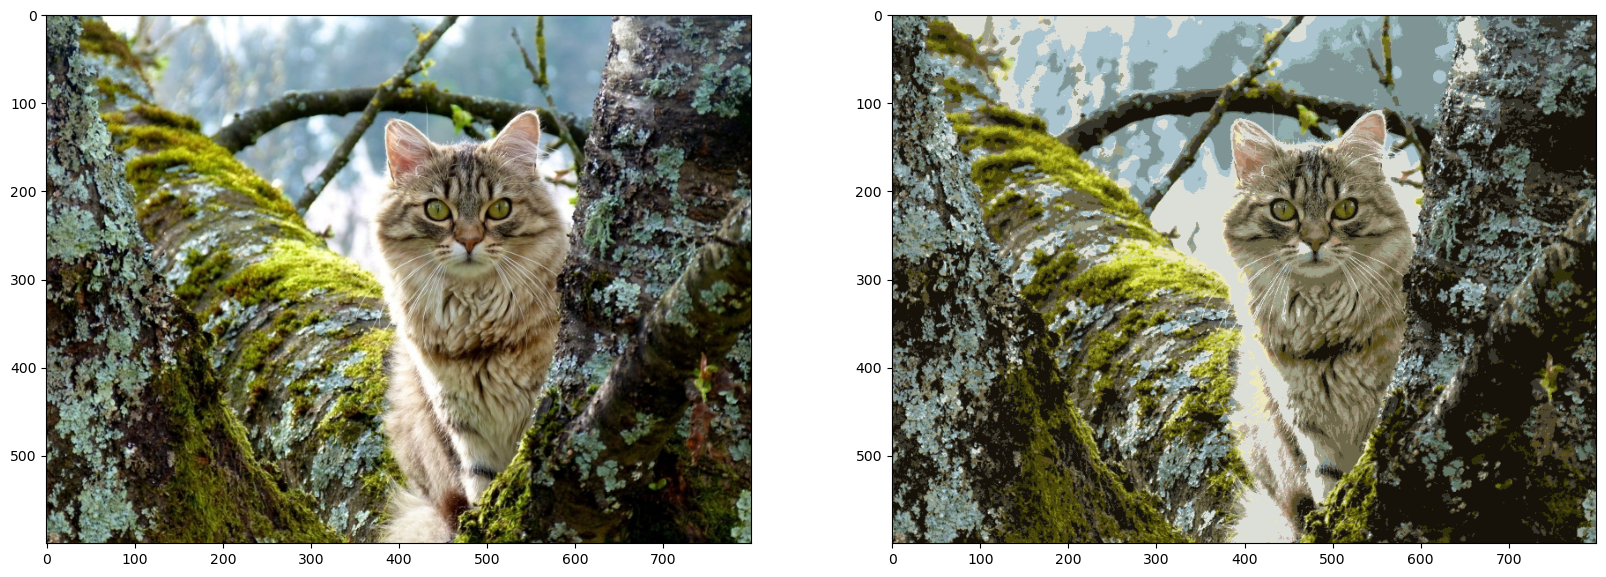

In [13]:
if __name__ == '__main__':
    main()